In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [37]:
class svm:
    def __init__(self,data,lr,lamb):
        self.lr=lr
        self.lamb=lamb
        self.w=np.zeros(len(data[0]))
        self.b=0
        

    def fit(self,X,y):

        while True:
            w_old=self.w
            b_old=self.b
            for i,x_i in enumerate(X):
                temp=y[i]*(np.dot(self.w,x_i)+self.b)>=1
                if temp:
                    self.w-=self.lr * (2 * self.lamb * self.w)
                else:
                    self.w-=self.lr * (2 * self.lamb * self.w - np.dot(x_i,y[i]))
                    self.b-=self.lr * (-y[i])
            if self.isConverged(w_old,b_old):
                print("converged")
                break
            
    def predict(self,X):
        y_pred=[]
        for i in range(len(X)):
            t=np.dot(self.w,X[i])+self.b
            y_pred.append(np.sign(t))
        return y_pred
    
    def isConverged(self,old_w,old_b):
        if old_b!=self.b:
            return False
        for i in range(len(old_w)):
            if self.w[i]!=old_w[i]:
                return False
            
        return True
        
    

In [38]:
def cal_accuracy(y1,y2):
    count=0
    for i in range(len(y1)):
        if int(y1[i])==int(y2[i]):
            count+=1
    return count/len(y1)

In [39]:
df=pd.read_csv('iris.csv')
X=np.array(df.iloc[:100,1:3]).tolist()
y=np.array(df.iloc[:100,-1]).tolist()
for i in range(len(y)):
    if y[i]=='Iris-setosa':
        y[i]=-1
    else:
        y[i]=1

X,y=shuffle(X,y,random_state=0)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)



In [40]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
lr,lamb=0.01,0.001
svm_obj=svm(X_train,lr,lamb)
svm_obj.fit(X_train,y_train)
y_pred=svm_obj.predict(X_test)
accuracy=cal_accuracy(y_test,y_pred)
print("W:",svm_obj.w)
print("b:",svm_obj.b)
print("Test set accuracy:",accuracy*100,"%")

converged
W: [ 1.68957165 -2.7391498 ]
b: -0.5100000000000002
Test set accuracy: 100.0 %


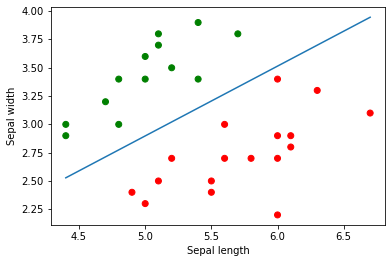

In [42]:
#plot svm
X = [X_test[i][0] for i in range(len(X_test))]
Y = [X_test[i][1] for i in range(len(X_test))]
# print(X)
# print(Y)

a = -svm_obj.b/svm_obj.w[1]
w = -svm_obj.w[0] / svm_obj.w[1]
min_1=min(X)
max_1=max(X)

xx=[min_1,max_1]
yy=[w*min_1+a,w*max_1+a]



plt.scatter(X,Y,c = np.where(np.array(y_test)==1,"red","green"))
plt.plot(xx, yy)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()